In [1]:
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv(r'C:\Users\Welcome\Downloads\winequality-red (1).csv')


In [12]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
y = data['quality']
x = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol']]

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


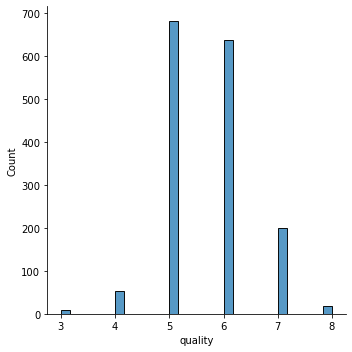

In [17]:
import seaborn as sb
sb.displot(data['quality'])


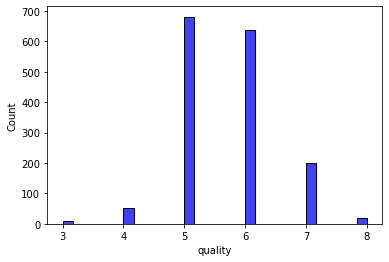

In [18]:
sb.histplot(data['quality'], color = 'blue')
pt.show()

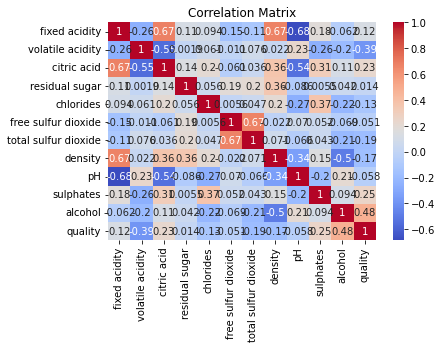

In [19]:
co_matrix = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol','quality']].corr()
sb.heatmap(co_matrix, annot = True, cmap = 'coolwarm')
pt.title('Correlation Matrix')
pt.show()

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
model= LinearRegression()


In [23]:
model.fit( x_train, y_train)


LinearRegression()

In [24]:
model.coef_


array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [25]:
pd.DataFrame(model.coef_,index=x.columns,columns=['mycoef'])


,mycoef
fixed acidity,0.023085
volatile acidity,-1.001304
citric acid,-0.140821
residual sugar,0.006564
chlorides,-1.806503
free sulfur dioxide,0.005627
total sulfur dioxide,-0.003644
density,-10.351594
pH,-0.393688
sulphates,0.841172


In [26]:
predict=model.predict(x_test)


In [27]:
r2_score(y_test,predict)


0.403180341279623

In [28]:
mean_absolute_error(y_test,predict)


0.5035304415524376

In [29]:
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)
Y = data['goodquality']

In [30]:
data['goodquality'].value_counts()


0    1382
1     217
Name: goodquality, dtype: int64

In [31]:
model.predict([[8, 0.5, 0.15, 1.9, 0.07, 23.0, 35.0, 0.92, 3.5, 0.65, 10.2]])


array([6.42656436])

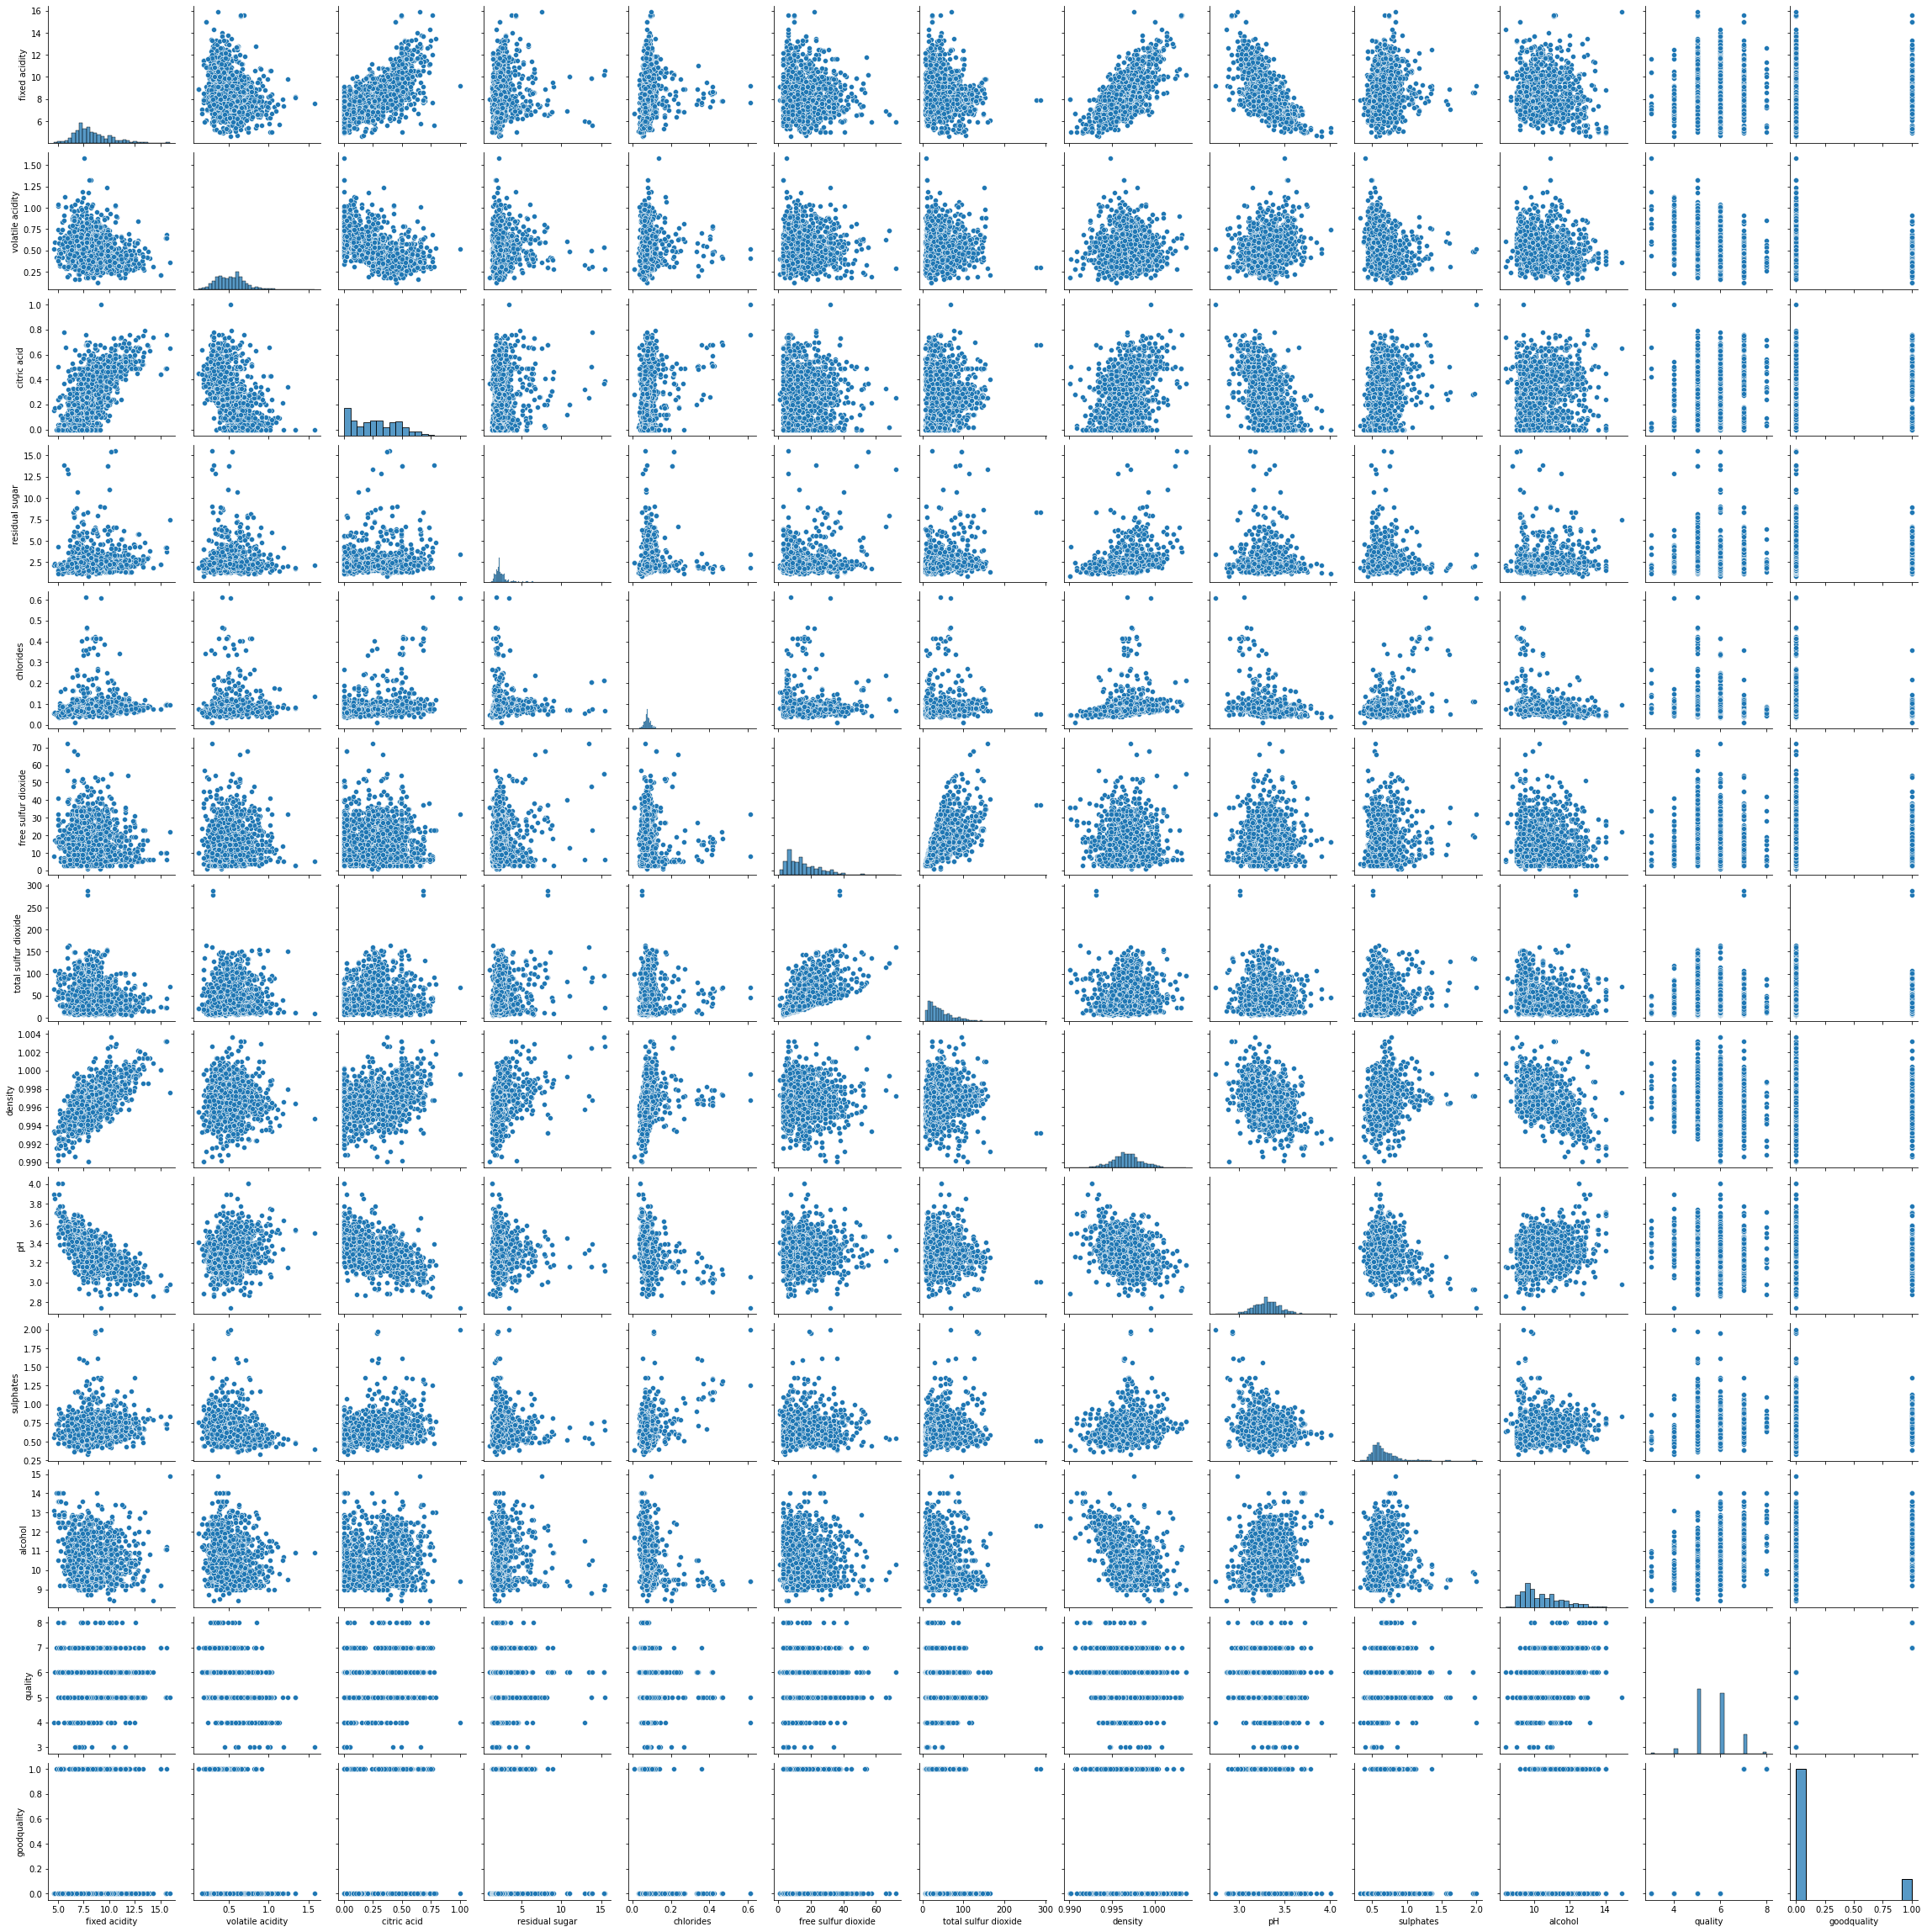

In [34]:
sns.pairplot(data)

In [36]:
data.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067